# **DEEPFILL-V2 DEMONSTRATION**

Colab code for image inpainting.


[DeepFillv2 Pytorch Repo](https://github.com/csqiangwen/DeepFillv2_Pytorch)

[Original Paper](https://arxiv.org/abs/1806.03589)


```
@article{yu2018generative,
  title={Generative Image Inpainting with Contextual Attention},
  author={Yu, Jiahui and Lin, Zhe and Yang, Jimei and Shen, Xiaohui and Lu, Xin and Huang, Thomas S},
  journal={arXiv preprint arXiv:1801.07892},
  year={2018}
}

@article{yu2018free,
  title={Free-Form Image Inpainting with Gated Convolution},
  author={Yu, Jiahui and Lin, Zhe and Yang, Jimei and Shen, Xiaohui and Lu, Xin and Huang, Thomas S},
  journal={arXiv preprint arXiv:1806.03589},
  year={2018}
}

```

**NOTE**

- The current colab code **DOES NOT** run on GPU. Has to be updated.
- The inpainting is being done after resizing the image to 512x512. This can be changed in the RESIZE_TO parameter in the _config.py_ file.




## **SETUP**

The below cell does the following-

Clone github repo: https://github.com/vrindaprabhu/deepfillv2_colab.git.  
Download the model file


In [1]:
#@title Run this cell for setup { display-mode: "form"}
!git clone https://github.com/vrindaprabhu/deepfillv2_colab.git
!gdown "https://drive.google.com/u/0/uc?id=1uMghKl883-9hDLhSiI8lRbHCzCmmRwV-&export=download"
!mv /content/deepfillv2_WGAN_G_epoch40_batchsize4.pth deepfillv2_colab/model/deepfillv2_WGAN.pth

Cloning into 'deepfillv2_colab'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 99 (delta 2), reused 1 (delta 1), pack-reused 96
Unpacking objects: 100% (99/99), done.
Downloading...
From: https://drive.google.com/u/0/uc?id=1uMghKl883-9hDLhSiI8lRbHCzCmmRwV-&export=download
To: /content/deepfillv2_WGAN_G_epoch40_batchsize4.pth
100% 64.8M/64.8M [00:00<00:00, 68.6MB/s]


**Change to the code directory**

In [2]:
cd deepfillv2_colab

/content/deepfillv2_colab


## **INPUTS AND MASKS**

The below cell is used to obtain the input images and create/upload masks.  
Please make sure that the right input and mask are correctly given, else the result may not be on the expected lines!

Example image and mask is present in `examples` folder.

In [6]:
#@title Run to upload the input image and generate/upload masks{ display-mode: "form" }
from google.colab import files
from ipywidgets import Button, HBox, VBox, widgets
from IPython.display import display, clear_output
import shutil 


from create_mask import create_bbox_mask, create_ff_mask


class StopExecution(Exception):
    def _render_traceback_(self):
        pass


def upload_file():
    uploaded = files.upload()
    try:
        fn = list(uploaded.keys())[0]
    except:
        print ("Please upload a valid image file!")
        raise StopExecution
    print('Uploaded file "{name}" of {length} bytes'.format(name=fn,length=len(uploaded[fn])))
    return fn


def on_button_clicked(b):
    with output:
        if b.description == "upload":
            clear_output()
            fn = upload_file()
            shutil.move(fn, "./input/mask.png")

        if b.description == 'random free-form':
            create_ff_mask()
            clear_output()
            print("random free form mask created and saved in input folder")

        if b.description == 'random bbox':
            create_bbox_mask()
            clear_output()
            print("random bounding box mask created and saved in input folder")

    print ("")
    print ("")
    print ("PLEASE RUN THE NEXT CELL")


print ("UPLOAD INPUT FILE")
fn = upload_file()
shutil.move(fn, "./input/input_img.png")

output = widgets.Output()
print ("")
print ("")
print ("SELECT MASK TYPE TO INPAINT")
words = ['random free-form', 'random bbox', 'upload']
items = [Button(description=w) for w in words]
display(HBox([items[0], items[1], items[2]]), output)

items[0].on_click(on_button_clicked)
items[1].on_click(on_button_clicked)
items[2].on_click(on_button_clicked)

UPLOAD INPUT FILE


Saving image1-2019-10-0818-11-09.png to image1-2019-10-0818-11-09.png
Uploaded file "image1-2019-10-0818-11-09.png" of 5067800 bytes


SELECT MASK TYPE TO INPAINT


Output()



PLEASE RUN THE NEXT CELL


## **INPAINT!!**

In [7]:
#@title Run to trigger inpainting. { display-mode: "form" }
!python inpaint.py

-- Generator is created! --
-- Initialized generator with xavier type --
-- INPAINT: Loading Pretrained Model --
/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
-- Inpainting is finished --


## **OUTPUT COMPARISION**

(-0.5, 511.5, 511.5, -0.5)

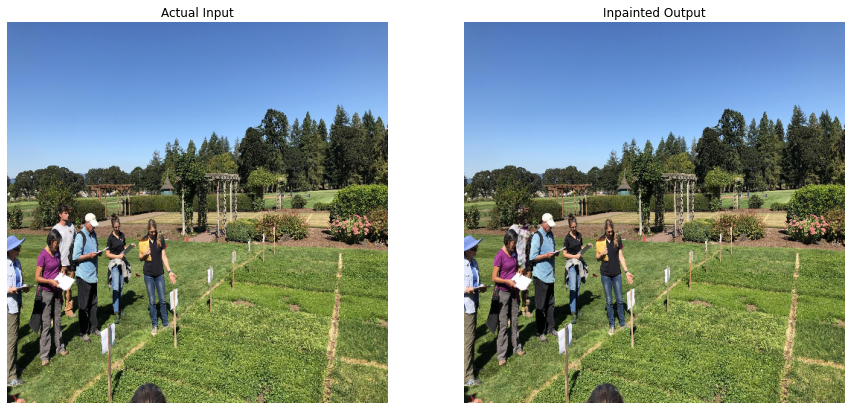

In [8]:
#@title Run to check the output.{ display-mode: "form" }
import cv2
import matplotlib.pyplot as plt
from IPython import display
from PIL import Image

resize_size = (512,512)

input_image = cv2.imread("input/input_img.png")
output_image = cv2.imread("output/inpainted_img.png")

f, axarr = plt.subplots(1,2, figsize=(15,15))
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
output_image = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

im = Image.fromarray(output_image)
im.save("output.jpeg")

axarr[0].imshow(cv2.resize(input_image, resize_size))
axarr[0].title.set_text('Actual Input')
axarr[0].axis('off')

axarr[1].imshow(cv2.resize(output_image, resize_size))
axarr[1].title.set_text('Inpainted Output')
axarr[1].axis('off')


Upload new images and run the trigger cell to observe outputs on different images.